In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../src/notebook_env.py


---------------------------------
Working on the host: unknownA07817A930E2

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python

---------------------------------
Root (ROOT) directory is set to /Users/jokr/Documents/ixians_UG/Project_SRH/proof_of_concept


# Der zentrale Grenzwertsatz

**Importiere Module**

In [2]:
# import math
import numpy as np

# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

Der **<a href="https://de.wikipedia.org/wiki/Zentraler_Grenzwertsatz">zentrale Grenzwertsatz</a>** ist eines der nützlichsten Konzepte der Statistik. Bei diesem Theorem geht es um die Ziehung von Stichproben einer endlichen Größe $n$ aus einer Grundgesamtheit. Das Theorem besagt, dass, wenn man Stichproben mit einem ausreichend großen Stichprobenumfang $n$ sammelt und den Mittelwert jeder Stichprobe berechnet, die Form des Histogramms dieser Mittelwerte sich einer Gauß-Verteilung annähert. Die Nützlichkeit des zentralen Grenzwertsatzes ergibt sich aus der Tatsache, dass **die Verteilung der Stichprobenmittelwerte unabhängig von der Verteilung der ursprünglichen Verteilung der Zufallsvariablen der Normalverteilung folgt** {cite:p}`mann2007introductory`.

## Die Grundgesamtheitsverteilung

Die **Grundgesamtheitsverteilung** ist die Wahrscheinlichkeitsverteilung, die sich aus der Kenntnis aller Elemente einer Grundgesamtheit ergibt {cite:p}`mann2007introductory`. Wir wissen, dass die interessierende Zufallsvariable je nach der betrachteten Grundgesamtheit eine diskrete Variable sein kann, d. h. eine Variable, die zumindest im Prinzip abzählbar ist (abzählbar unendlich), oder die Zufallsvariable kann eine kontinuierliche Variable sein, d. h. eine Variable, die jeden Wert innerhalb eines bestimmten Intervalls annehmen kann (überabzählbar unendlich). Sowohl die diskrete als auch die kontinuierliche Wahrscheinlichkeitsverteilung kann durch statistische Parameter wie den Mittelwert, die Standardabweichung, den Median, den Modalwert und andere beschrieben werden. Diese Parameter, die die Grundgesamtheit beschreiben, sind jedoch **immer konstant**, da die Grundgesamtheit die Menge aller Elemente ist und sich somit die Grundgesamtheitsstatistik nicht ändert. So gibt es beispielsweise für jeden Populationsdatensatz **nur einen Wert** für den Populationsmittelwert, **einen Wert** für die Standardabweichung usw.

## Grundgesamtheitsstatistiken und Stichprobenstatistiken

Betrachten wir ein einfaches Beispiel für eine kleine diskrete Grundgesamtheit, die aus den ersten zehn ganzen Zahlen $\{1,2,3,4,5,6,7,8,9,10\}$ besteht.

In [3]:
population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mean = np.mean(population)
std = np.std(population)

print(f"Mittelwert (Grundgesamtheit):         {mean}")
print(f"Standartabweichung (Grundgesamtheit): {std}")

Mittelwert (Grundgesamtheit):         5.5
Standartabweichung (Grundgesamtheit): 2.8722813232690143


Der Populationsmittelwert $μ$, und die Populationsstandardabweichung $σ$ beträgt $5,5$ bzw. etwa $3,028$. Es ist wichtig zu erkennen, dass sich diese Parameter, die Populationsparameter, nicht ändern! Sie sind durch die Grundgesamtheit festgelegt.

Nehmen wir nun eine Zufallsstichprobe ohne Ersetzung mit dem Umfang $n=3$ aus dieser Grundgesamtheit. 

In [4]:
my_sample = np.random.choice(population, size=3, replace=False)
my_sample

array([ 9,  8, 10])

Nun berechnen wir den Mittelwert und die Standardabweichung der gegebenen Stichprobe. Da wir uns aber auf eine bestimmte Stichprobe beziehen, nennen wir den statistischen Parameter diesmal **Stichprobenstatistik** oder, wenn wir uns auf die Verteilung der Werte (Elemente) beziehen, **Stichprobenverteilung**. Um dies zu verdeutlichen, wird der Stichprobenmittelwert mit $\bar{x}$ und die Stichprobenstandardabweichung mit $s$ bezeichnet.

In [5]:
x_bar = np.mean(my_sample)
s = np.std(my_sample, ddof=1)

print(f"Mittelwert (Stichprobe):         {x_bar}")
print(f"Standartabweichung (Stichprobe): {s}")

Mittelwert (Stichprobe):         9.0
Standartabweichung (Stichprobe): 1.0


Bitte beachten Sie, dass sich die Stichprobenstatistiken je nach den tatsächlichen Elementen in der Stichprobe von Stichprobe zu Stichprobe ändern.

## Der Stichprobenfehler

Wir wiederholen die Stichprobe aus dem vorigen Abschnitt fünfmal und geben den Mittelwert $\bar{x}$ für jede einzelne Stichprobe aus.

In [6]:
for i in range(5):
    my_sample = np.random.choice(population, size=3, replace=False)
    mean = np.mean(my_sample)
    print(f"Die {i}. Stichprobe hat einen Mittelwert von {mean}")

Die 0. Stichprobe hat einen Mittelwert von 5.333333333333333
Die 1. Stichprobe hat einen Mittelwert von 5.333333333333333
Die 2. Stichprobe hat einen Mittelwert von 6.333333333333333
Die 3. Stichprobe hat einen Mittelwert von 7.333333333333333
Die 4. Stichprobe hat einen Mittelwert von 5.333333333333333


Es liegt auf der Hand, dass verschiedene Stichproben (mit derselben Länge), die aus derselben Grundgesamtheit ausgewählt wurden, unterschiedliche Stichprobenstatistiken ergeben, da sie unterschiedliche Elemente enthalten. Darüber hinaus unterscheidet sich jede aus einer Stichprobe gewonnene Stichprobenstatistik, z. B. der Stichprobenmittelwert $\bar{x}$, von dem Ergebnis, das aus der entsprechenden Grundgesamtheit, dem Grundgesamtheitsmittelwert $μ$, gewonnen wird. Die Differenz zwischen dem Wert einer aus einer Stichprobe gewonnenen Statistik und dem Wert des entsprechenden, aus der Grundgesamtheit gewonnenen Parameters wird als **<a href="https://en.wikipedia.org/wiki/Sampling_error">Stichprobenfehler</a>** bezeichnet. Im Fall des Mittelwerts kann der Stichprobenfehler wie folgt geschrieben werden

$$ \text{Sampling error} = \bar{x} - \mu$$

Aufgrund des Charakters von Zufallsstichproben und willkürlichen Ziehung einer Reihe von Werten aus der Grundgesamtheit ist der daraus resultierende Stichprobenfehler zufällig, oder anders gesagt, der Stichprobenfehler ist eine Zufallsvariable. Es ist jedoch zu beachten, dass es neben der beschriebenen Zufälligkeit noch andere Fehlerquellen gibt. Diese Fehler hängen oft mit dem Prozess der Datenerzeugung zusammen und werden unter dem Begriff <a href="https://en.wikipedia.org/wiki/Non-sampling_error">Nicht-Stichprobenfehler</a> zusammengefasst. Solche Fehler werden beispielsweise durch die menschliche Handhabung der Daten, Kalibrierungsfehler der Messgeräte etc. verursacht.

Um ein Gefühl für die Art des Stichprobenfehlers zu bekommen, führen wir ein Experiment durch. Bei diesem Experiment besteht die interessierende Grundgesamtheit aus den ersten $100$ ganzen Zahlen $\{1,2,3,...,100\}$. Wir wollen den Einfluss des Stichprobenumfangs $n$ auf den Stichprobenfehler untersuchen. Der Einfachheit halber wählen wir den Stichprobenmittelwert als die interessierende Statistik. Für eine ausreichend große Anzahl von Versuchen (z.B. 5000 Versuche) berechnen wir den Stichprobenfehler für Stichproben mit dem Umfang $n=10,25,50,75$.

In [7]:
TRIAL_SIZE = 5000  # 5000 Versuche
SAMPLE_SIZE = [10, 25, 50, 75]  # Stichprobenumfang
population = range(1, 101)
mean_pop = np.mean(population)
for n in SAMPLE_SIZE:
    error_sample = []
    for _ in range(TRIAL_SIZE):
        my_sample = np.random.choice(population, size=n, replace=False)
        mean = np.mean(my_sample)
        error_sample.append(abs(mean - mean_pop))
    print(f"Stichprobenfehler (n={n}):", np.mean(error_sample))

Stichprobenfehler (n=10): 6.9104399999999995
Stichprobenfehler (n=25): 4.002264
Stichprobenfehler (n=50): 2.3208879999999996
Stichprobenfehler (n=75): 1.339818666666667


Aus dem obigen Experiment können wir schließen, dass der Stichprobenfehler umso kleiner ist, je größer der Stichprobenumfang ist. Mit anderen Worten: Je größer der Stichprobenumfang ist, desto mehr nähert sich der Stichprobenmittelwert $\bar{x}$ dem Grundgesamtheitsmittelwert $μ$ an. Dies ist eine wichtige Erkenntnis, die im Abschnitt über die *Inferenzstatistik* ausführlicher behandelt werden wird.

## Die Stichprobenverteilung

Ausgehend von unserer Intuition der Zufälligkeit im Stichprobenprozess führen wir die **<a href="https://en.wikipedia.org/wiki/Sampling_distribution">Stichprobenverteilung</a>** ein. Die Stichprobenverteilung ist eine Verteilung einer Stichprobenstatistik *(Lovirc 2010)*. Oft wird der Name der berechneten Statistik als Teil des Titels hinzugefügt. Wenn es sich bei der berechneten Statistik beispielsweise um den Stichprobenmittelwert handelt, würde die Stichprobenverteilung den Titel **Stichprobenverteilung des Stichprobenmittelwerts** tragen.

Erinnern wir uns an das einfache Beispiel aus dem vorigen Abschnitt, bei dem die Grundgesamtheit durch die ersten $100$ ganzen Zahlen $\{ 1,2,3,\dots,100 \}$ repräsentiert wurde. Wenn wir wiederholt Stichproben aus dieser Grundgesamtheit ziehen und jedes Mal die Stichprobenstatistik (z. B. $\bar{x}$ oder $s$,...) berechnen, wird **die resultierende Verteilung der Stichprobenstatistik als Stichprobenverteilung dieser Statistik** bezeichnet.

Aus dieser Grundgesamtheit nehmen wir wiederholt Zufallsstichproben $(x)$ ohne Ersetzung mit der Größe $n=30$. Die Zufallsstichproben könnten Mengen erzeugen, die wie folgt aussehen :

$$\{19, 79, 33, 38, 14, 67, 7, 9, 12, 27, 4, 89, 34, 77, 78, 32, 65, 10, 84, 64, 90, 55, 88, 56, 11, 80, 15, 5, 91, 54\}$$

oder

$$\{43, 52, 56, 8, 65, 60, 46, 15, 64, 19, 82, 91, 88, 1, 5, 9, 4, 92, 67, 36, 72, 31, 50, 96, 87, 6, 93, 84, 78, 16\}$$

... etc.

Für jede Stichprobe berechnen wir eine Stichprobenstatistik. In diesem Beispiel nehmen wir den Mittelwert, $\bar{x}$, jeder Stichprobe. Beachten Sie jedoch, dass es sich bei der Stichprobenstatistik um eine beliebige deskriptive Statistik handeln kann, z. B. um den Median, die Standardabweichung, einen Anteil usw. Sobald wir die Stichprobenmittelwerte für alle Stichproben erhalten haben, listen wir alle ihre verschiedenen Werte und die Anzahl ihres Auftretens (Häufigkeiten) auf, um relative Häufigkeiten oder **empirische Wahrscheinlichkeiten** zu erhalten.

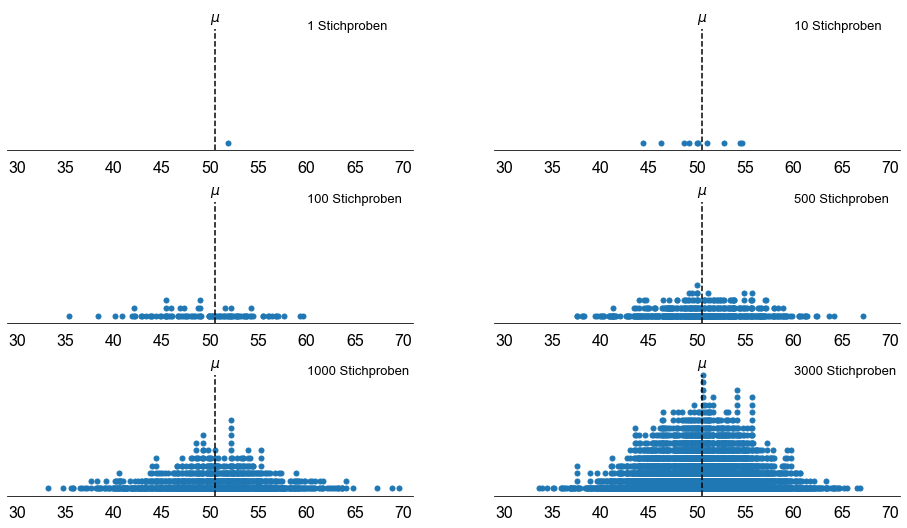

In [8]:
import matplotlib.pyplot as plt


def dot_diagram(dataset, ax=None, min_max=(30, 70)):
    """
    Function to compute a dotplot.
    Inspried by https://stackoverflow.com/a/66398730
    """
    values, counts = np.unique(dataset, return_counts=True)
    data_range = max(values) - min(values)
    # fig_width = data_range / 2 if data_range < 30 else 15
    fig_width = 16
    fig_height = max(counts) / 3 if data_range < 50 else max(counts) / 4
    marker_size = 5
    if ax is None:
        fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    for value, count in zip(values, counts):
        ax.plot(
            [value] * count,
            list(range(count)),
            marker="o",
            color="tab:blue",
            markersize=marker_size,
            linestyle="",
        )
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.yaxis.set_visible(False)
    # ax.set_ylim(-1, max(counts))
    ax.set_ylim(-1, 18)
    ax.set_xticks(range(min_max[0], min_max[1] + 1, 5))
    ax.set_xlim(min_max[0] - 1, min_max[1] + 1)
    ax.tick_params(axis="x", length=0, pad=10)


# population = list(range(1, 101))
# mean_pop = np.mean(population)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 9))
_axes = np.ravel(axes)
trials = [1, 10, 100, 500, 1000, 3000]
SAMPLE_SIZE = 30
np.random.seed(42)
for e, trial in enumerate(trials):
    sample_statistic = []
    for n in range(trial):
        sample = np.random.choice(population, size=SAMPLE_SIZE)
        mean_sample = np.mean(sample)
        sample_statistic.append(mean_sample)
    dot_diagram(sample_statistic, ax=_axes[e])
    _axes[e].text(x=60, y=15, s=f"{trials[e]} Stichproben", size=13)
    _axes[e].text(x=mean_pop, y=16, s=f"$\mu$", size=14, ha="center")
    _axes[e].vlines(x=mean_pop, ymin=-1, ymax=15, color="k", linestyle="dashed")

Je häufiger wir eine Stichprobe nehmen, desto besser nähert sich die relative Häufigkeitsverteilung der Stichprobenstatistik der Stichprobenverteilung an. Mit anderen Worten: Wenn die Anzahl der Stichproben gegen unendlich geht, nähert sich die resultierende Häufigkeitsverteilung der Stichprobenverteilung an. **Die Stichprobenverteilung einer Statistik** ist eine Wahrscheinlichkeitsverteilung dieser Statistik, die aus allen möglichen Stichproben mit demselben Umfang aus der Grundgesamtheit abgeleitet wird. Die Stichprobenverteilung sollte jedoch nicht mit einer Stichprobenverteilung verwechselt werden: Letztere beschreibt die Verteilung der Werte (Elemente) in einer bestimmten Stichprobe.

## Der Standardfehler

Ebenso wie die Verteilungen der Grundgesamtheit können auch die Stichprobenverteilungen mit Parametern beschrieben werden. Der Erwartungswert (Mittelwert) einer beliebigen Verteilung kann durch das Symbol $\mu$ dargestellt werden. Im Falle der Stichprobenverteilung wird der Mittelwert $\mu$ oft mit einem tiefgestellten Index geschrieben, um anzugeben, welche Stichprobenverteilung beschrieben wird. Der Erwartungswert der Stichprobenverteilung des Mittelwerts wird zum Beispiel durch das Symbol $\mu_{\bar{x}}$ dargestellt. Der Wert von $\mu_{\bar{x}}$ kann als der theoretische Mittelwert der Verteilung der Stichprobenmittelwerte angesehen werden.

Wenn wir aus einer Grundgesamtheit eine ausreichend große Anzahl von Stichproben (mit gleichem Umfang) auswählen und deren Mittelwerte berechnen, dann nähert sich der Mittelwert ($\mu_{\bar{x}}$) all dieser Stichprobenmittelwerte dem Mittelwert ($\mu$) der Grundgesamtheit an. Deshalb wird der Stichprobenmittelwert $\bar{x}$ als Schätzer des Populationsmittelwertes $\mu$ bezeichnet. Somit ist der Mittelwert der Stichprobenverteilung gleich dem Mittelwert der Grundgesamtheit.

$$\mu_{\bar{x}} = \mu$$

Für die Standardabweichung einer Stichprobenverteilung gibt es eine besondere Bezeichnung, den **<a href="https://en.wikipedia.org/wiki/Standard_error">Standardfehler</a>**. Der Standardfehler der Stichprobenverteilung einer Statistik, bezeichnet als $\sigma_{\bar{x}}$, beschreibt das Ausmaß, in dem die berechneten Statistiken erwartungsgemäß voneinander abweichen, wenn sie anhand einer Stichprobe ähnlichen Umfangs berechnet und aus ähnlichen Grundgesamtheitsmodellen ausgewählt werden. Je größer der Standardfehler einer bestimmten Statistik ist, desto größer sind die Unterschiede zwischen den berechneten Statistiken für die verschiedenen Stichproben *(Lovric 2010)*.

Es ist jedoch zu beachten, dass der Standardfehler $\sigma_{\bar{x}}$ nicht gleich der Standardabweichung $\sigma$ der Verteilung der Grundgesamtheit ist (es sei denn, $n=1$). Der Standardfehler ist gleich der Standardabweichung der Grundgesamtheit geteilt durch die Quadratwurzel des Stichprobenumfangs :

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

Diese Gleichung gilt nur, wenn die Stichprobe entweder mit Ersatz aus einer endlichen Grundgesamtheit oder mit oder ohne Ersatz aus einer unendlichen Grundgesamtheit gezogen wird. Dies entspricht der Bedingung, dass der Stichprobenumfang $(n)$ im Vergleich zum Grundgesamtheitsumfang $(N)$ klein ist. Der Stichprobenumfang gilt als klein im Vergleich zum Umfang der Grundgesamtheit, wenn der Stichprobenumfang gleich oder weniger als 5 % des Umfangs der Grundgesamtheit ist, d. h., wenn

$$\frac{n}{N} \leq 0.05$$

Wenn diese Bedingung nicht erfüllt ist, wird die folgende Gleichung zur Berechnung von $\sigma_{\bar{x}}$ verwendet :

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} \sqrt{\frac{N-n}{N-1}}$$

In den meisten praktischen Anwendungen ist der Stichprobenumfang jedoch klein im Vergleich zur Grundgesamtheit.

## Stichproben aus einer normalverteilten Grundgesamtheit

### Form der Stichprobenverteilung

Die Form der Stichprobenverteilung bezieht sich auf die beiden folgenden Fälle :

1. Die Grundgesamtheit, aus der die Stichproben gezogen werden, ist normalverteilt.

2. Die Grundgesamtheit, aus der die Stichproben gezogen werden, ist nicht normalverteilt.

### Stichproben aus einer normalverteilten Grundgesamtheit

Wenn die Grundgesamtheit, aus der die Stichproben gezogen werden, normalverteilt ist und ihr Mittelwert gleich $\mu$ und ihre Standardabweichung gleich $\sigma$ ist, dann gilt :

1. Der Mittelwert der Stichprobenmittel, $\mu_{\bar{x}}$, ist gleich dem Mittelwert der Grundgesamtheit, $\mu$

2. Die Standardabweichung der Stichprobenmittelwerte,$\sigma_{\bar{x}}$
ist gleich $\frac{\sigma}{\sqrt{n}}$, wobei $\frac{n}{N} ≤ 0.05$ angenommen wird.

3. Die Form der Stichprobenverteilung der Stichprobenmittelwerte $\bar{x}$
ist normal, unabhängig vom Wert von $n$.

Betrachten wir eine normalverteilte Grundgesamtheit. Der Einfachheit halber verwenden wir die Standardnormalverteilung, $N∼(\mu,\sigma)$, mit $\mu=0$ und $\sigma=1$. Berechnen wir nun $\mu_{\bar{x}}$ und $\sigma_{\bar{x}}$ für Stichproben mit dem Stichprobenumfang $n=5,15,30,50$.

Es sei daran erinnert, dass für eine hinreichend große Anzahl wiederholter Stichproben $\mu_{\bar{x}}≈\mu$. Somit $\mu_{\bar{x}}$ der verschiedenen betrachteten Stichprobenverteilungen :

$$\mu_{\bar x_{n=5}} = \mu_{\bar x_{n=15}} = \mu_{\bar x_{n=30}} = \mu_{\bar x_{n=50}} = \mu = 0$$

Wir erinnern uns an den Standardfehler der Stichprobenverteilung $\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}$. Wir können also $\sigma_{\bar{x}}$ für $n=5,15,30,50$ Elemente leicht berechnen. Die verschiedenen Stichprobenverteilungen werden im Folgenden visualisiert.

$$\sigma_{\bar x_{n=5}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{5}}\approx 0.447$$

$$ \sigma_{\bar x_{n=15}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{15}}\approx 0.258 $$

$$ \sigma_{\bar x_{n=30}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{30}}\approx 0.183 $$

$$ \sigma_{\bar x_{n=50}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{50}} \approx 0.141 $$

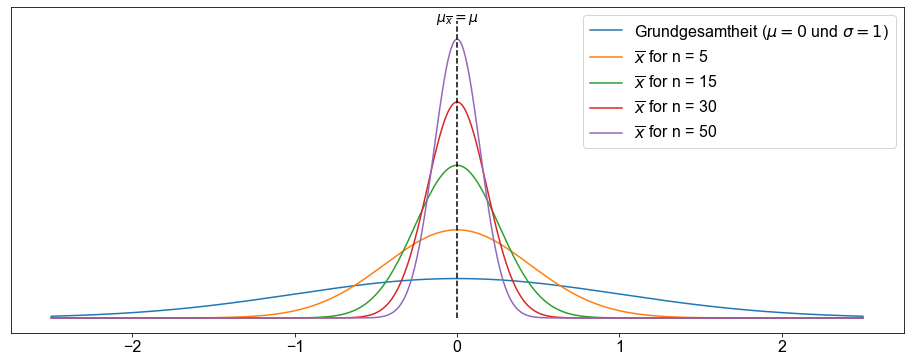

In [9]:
from scipy.stats import norm

mu = 0
x = np.linspace(mu - 2.5, mu + 2.5, 1000)
n = [1, 5, 15, 30, 50]
fig, ax = plt.subplots(figsize=(16, 6))
for e, _n in enumerate(n):
    sigma = 1 / np.sqrt(_n)
    if _n == 1:
        label = "Grundgesamtheit ($\mu=0$ und $\sigma=1$)"
    else:
        label = "$\overline{x}$ for" + f" n = {_n}"
    ax.plot(x, norm.pdf(x, mu, sigma), label=label)
ax.legend(fontsize=16)
ax.text(x=mu, y=3, s="$\mu_\overline{x}=\mu$", size=14, ha="center")
ax.vlines(x=mu, ymin=0, ymax=3, color="k", linestyle="dashed")
ax.axes.yaxis.set_visible(False)

Es gibt zwei wichtige Beobachtungen bezüglich der Stichprobenverteilung von $\bar{x}$

1. Die Streuung der Stichprobenverteilung ist kleiner als die Streuung der entsprechenden Grundgesamtheitsverteilung. Mit anderen Worten: $\sigma_{\bar{x}}<\sigma$

2. Die Standardabweichung der Stichprobenverteilung nimmt mit zunehmendem Stichprobenumfang ab.

Um die 3. Behauptung von oben, dass die Form der Stichprobenverteilung von $\bar{x}$ unabhängig vom Wert von $n$ normal ist, zu überprüfen, führen wir eine numerische Simulation durch. Für eine ausreichend große Anzahl von Versuchen (Versuche = 1000) ziehen wir Stichproben aus der Standardnormalverteilung $N∼(\mu=0,\sigma=1)$, wobei jede einzelne Stichprobe einen Stichprobenumfang von $n=5,15,30,50$ hat. Für jede Stichprobe berechnen wir den Stichprobenmittelwert $\bar{x}$ und stellen die empirischen Wahrscheinlichkeiten dar. Anschließend vergleichen wir die empirische Verteilung dieser Wahrscheinlichkeiten mit den aus den obigen Gleichungen berechneten Stichprobenverteilungen.

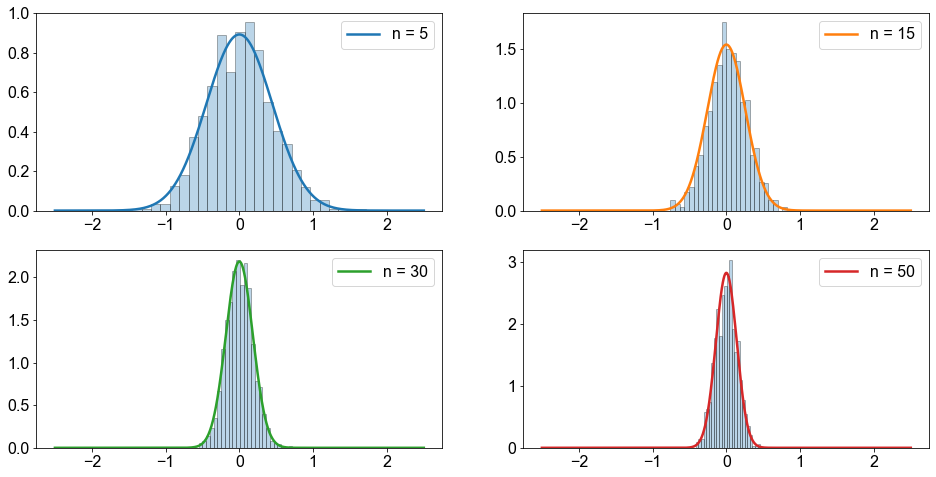

In [10]:
mu = 0
x = np.linspace(mu - 2.5, mu + 2.5, 1000)
n = [5, 15, 30, 50]
N = 1000
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
ax = np.ravel(axes)
np.random.seed(42)
for e, _n in enumerate(n):
    sigma = 1 / np.sqrt(_n)
    random_sample = norm.rvs(loc=mu, scale=sigma, size=N)
    ax[e].hist(random_sample, ec="black", density=True, bins=25, alpha=0.3)

    label = f"n = {_n}"
    ax[e].plot(x, norm.pdf(x, mu, sigma), label=label, color=f"C{e}", linewidth=2.5)
    ax[e].legend(fontsize=16)

Die Abbildung verifiziert die 3. Behauptung von oben: Die Form der Stichprobenverteilung von $\bar{x}$ ist für jeden Wert von $n$ normal.

Darüber hinaus zeigt die Abbildung, dass die Verteilung der empirischen Wahrscheinlichkeiten (Balken) gut mit der Stichprobenverteilung (farbige Linie) übereinstimmt und dass die Standardabweichung der Stichprobenverteilung von $\bar{x}$ mit zunehmendem Stichprobenumfang abnimmt. Es sei daran erinnert, dass die $y$-Achse die *Dichte* darstellt, d. h. die **Wahrscheinlichkeit pro Einheitswert** der Zufallsvariablen. Aus diesem Grund kann die Wahrscheinlichkeitsdichte einen Wert größer als 1 annehmen, aber nur über einen Bereich mit einer Größe kleiner als 1.

## Stichproben aus einer nicht normalverteilten Grundgesamtheit

### Form der Stichprobenverteilung

Die Form der Stichprobenverteilung bezieht sich auf die beiden folgenden Fälle.

1. Die Grundgesamtheit, aus der die Stichproben gezogen werden, ist normalverteilt.

2. Die Grundgesamtheit, aus der die Stichproben gezogen werden, ist nicht normalverteilt.

### Stichproben aus einer nicht normalverteilten Grundgesamtheit

Im vorangegangenen Abschnitt haben wir die Form von Stichprobenverteilungen erörtert, wenn eine Stichprobe aus einer normalverteilten Grundgesamtheit gezogen wird. In realen Anwendungen kennen wir jedoch oft nicht die tatsächliche Form der Grundgesamtheit.

Um zu verstehen, wie die Form der Verteilung der interessierenden Grundgesamtheit die Form der Stichprobenverteilung beeinflusst, führen wir ein Experiment durch. Wir betrachten drei verschiedene kontinuierliche Wahrscheinlichkeitsdichtefunktionen: die **Gleichverteilung**, die **Beta-Verteilung** und die **Gamma-Verteilung**. Wir gehen hier nicht ins Detail, aber die folgende Abbildung zeigt, dass diese drei PDF´s (Probability Density Functions) nicht normalverteilt sind.

In [ ]:
from scipy.stats import uniform, beta, gamma
import matplotlib.pyplot as plt

titles = [
    "Uniform distribution (a=0.2, b=0.8)",
    "Beta distribution (alpha=2, beta=5)",
    "Gamma distribution (alpha=1, beta=2)",
]
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(0, 1, 1000)
ax[0].plot(x, uniform.pdf(x, 0.2, 0.6))
ax[1].plot(x, beta.pdf(x, 2, 5))
x = np.linspace(0, 10, 1000)
ax[2].plot(x, gamma.pdf(x, a=1, scale=2))
for e, _ax in enumerate(ax):
    _ax.axes.yaxis.set_visible(False)
    _ax.set_title(titles[e], size=18)

Nun führen wir das gleiche Experiment wie im vorherigen Abschnitt durch. Für eine ausreichend große Anzahl von Versuchen <mark>Versuche = 1000 </mark> ziehen wir aus jeder einzelnen Verteilung eine Stichprobe. Diesmal hat jedoch jede einzelne Stichprobe einen Stichprobenumfang $n=2,5,15,30$. Für jede Stichprobe berechnen wir den Stichprobenmittelwert $\bar{x}$ und stellen die empirischen Wahrscheinlichkeiten nach $1000$ Versuchen dar.

In [ ]:
TRIALS = 1000
sample_sizes = [2, 5, 15, 30]
np.random.seed(42)
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(16, 14))
titles = [
    "Uniform distribution (a=0.2, b=0.8)",
    "Beta distribution (alpha=2, beta=5)",
    "Gamma distribution (alpha=1, beta=2)",
]
xlim = [(0.48, 0.52), (0.27, 0.30), (2.9, 3.1)]
for row, sample_size in enumerate(sample_sizes):
    for col, distribution in enumerate([uniform(0.2, 0.6), beta(2, 5), gamma(1, 2)]):
        sample = []
        for _ in range(TRIALS):
            sample.append(np.mean(distribution.rvs(size=sample_sizes)))
        ax[row, col].hist(
            sample, ec="black", density=False, bins=20, alpha=0.3, color=f"C{col}"
        )
        ax[row, col].set_title(f"{titles[col]}\nfor sample size {sample_size}", size=16)
        ax[row, col].set_xlim(xlim[col])
        ax[row, col].axes.yaxis.set_visible(False)
fig.tight_layout()

![sampling_beta_gamma_uniform](_img/sampling_beta_gamma_uniform.png)

Die Abbildung zeigt, dass im Falle einer nicht normalverteilten Grundgesamtheit die Stichprobenverteilungen nicht normalverteilt sind, wenn $n<30$. Allerdings nähern sich die Stichprobenverteilungen einer Normalverteilung an, wenn $n>30$. Man sieht auch, dass die Streuung der Stichprobenverteilung mit zunehmendem Stichprobenumfang abnimmt.

Nach dem **zentralen Grenzwertsatz** ist die Stichprobenverteilung bei einem großen Stichprobenumfang $(n > 30)$ annähernd normal, unabhängig von der Form der Grundgesamtheitsverteilung.

Der Mittelwert und die Standardabweichung der Stichprobenverteilung von $\bar{x}$ sind jeweils,

$$mu_{\bar{x}} = \mu \text{ und } \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

Der Stichprobenumfang wird gewöhnlich als groß angesehen, wenn $n \geq 30$ ist.

Da die Stichprobenverteilung eine Normalverteilung approximiert, liefert die Fläche unter der Kurve der Stichprobenverteilung probabilistische Informationen über die Stichprobenstatistik.

Erinnern Sie sich an die **empirische Regel**, auch bekannt als die **68-95-99,7-Regel**. Auf die Stichprobenverteilung angewandt bedeutet die $68-95-99,7$-Regel folglich, dass

- etwa $68,26$% der Stichprobenmittelwerte innerhalb einer Standardabweichung des Populationsmittelwerts liegen werden,

- $95,44$% der Stichprobenmittelwerte innerhalb von zwei Standardabweichungen des Populationsmittelwertes liegen und

- etwa $99,74$% der Stichprobenmittelwerte innerhalb von drei Standardabweichungen des Mittelwerts der Grundgesamtheit liegen.